<center><h3>Regression analysis of various factors' impact on murder rate in the USA</h3></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%pip install xgboost
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

Upon loading the necessary libraries, I take the <em>statecrime</em> dataset from <strong>statsmodels</strong> library, and preprocess the data before doing my analysis.

In [3]:
crime = sm.datasets.statecrime.load().data

In [4]:
crime.columns

Index(['violent', 'murder', 'hs_grad', 'poverty', 'single', 'white', 'urban'], dtype='object')

In [5]:
y = np.array(crime.murder)

In [6]:
X = np.column_stack((crime.poverty, crime.hs_grad, crime.white))

In [7]:
X.shape

(51, 3)

In [8]:
y.shape

(51,)

In [9]:
X.ndim

2

In [10]:
y.ndim

1

In order to check the accuracy and goodnes-of-fit of our models, we split our data to train and test bunches.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)

In [12]:
X_train.shape

(38, 3)

In [43]:
X_test.shape

(13, 3)

<h4>Random Forest Regressor</h4>

In [14]:
RandomForest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)

In [15]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [16]:
y_pred = RandomForest.predict(X_test)

In [17]:
np.corrcoef(y_pred, y_test)

array([[1.        , 0.74404577],
       [0.74404577, 1.        ]])

In [18]:
r2_score(y_true=y_test, y_pred=y_pred)

0.5397213782645679

In [19]:
explained_variance_score(y_pred=y_pred, y_true=y_test)

0.5526743244512002

<h4>Supported Vector Machines Regressor</h4>

In [20]:
svr = SVR(C=50, max_iter=100)

In [21]:
svr.fit(X_train, y_train)

SVR(C=50, max_iter=100)

In [22]:
y_pred_svm = svr.predict(X_test)

In [23]:
r2_score(y_pred=y_pred_svm, y_true=y_test)

0.6006195763430027

In [24]:
explained_variance_score(y_pred=y_pred_svm, y_true=y_test)

0.6662977093105362

<h4>Linear Regressor</h4>

In [25]:
linear = LinearRegression(n_jobs=100)

In [26]:
linear.fit(X_train, y_train)

LinearRegression(n_jobs=100)

In [27]:
y_pred_lin = linear.predict(X_test)

In [28]:
r2_score(y_pred=y_pred_lin, y_true=y_test)

0.7171803998480321

In [29]:
explained_variance_score(y_true=y_test, y_pred=y_pred_lin)

0.7465542124548058

<h4>XGBoost Regressor</h4>

In [30]:
xgb = XGBRFRegressor()

In [31]:
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [32]:
y_pred_xgb = xgb.predict(X_test)

In [33]:
r2_score(y_pred=y_pred_xgb, y_true=y_test)

0.6033135000769869

In [34]:
explained_variance_score(y_pred=y_pred_xgb, y_true=y_test)

0.6312402797184394

<h4>The models' parameters and concluding remarks</h4>

In [35]:
linear.coef_ # model coefficients according to linear model

array([ 0.63511511,  0.14063758, -0.13722668])

In [36]:
RandomForest.feature_importances_

array([0.28821074, 0.40694824, 0.30484102])

In [40]:
sum(linear.coef_) # we need this to use in our plot

0.638526002219101

In [37]:
y_pred_lin[0]

3.2989760082051722

In [42]:
y_test[0]

5.4

<Figure size 6272x4704 with 0 Axes>

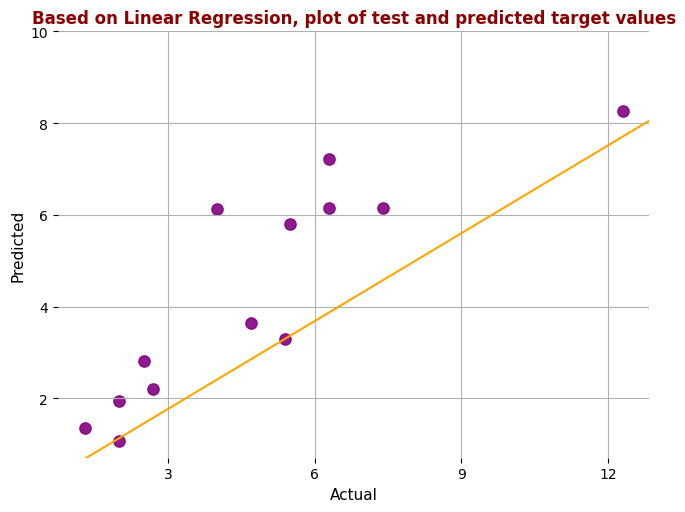

<Figure size 6272x4704 with 0 Axes>

In [41]:
plt.scatter(x=y_test, y=y_pred_lin, s=66, alpha=0.89, c='purple')
plt.grid(visible=True)
plt.tight_layout()
plt.axline(slope=0.638526002219101, xy1=(5.4,3.2989760082051722), c='orange')
plt.title("Based on Linear Regression, plot of test and predicted target values", fontdict={'color': 'darkred', 'fontweight': 'bold'})
plt.xticks(range(3,13,3))
plt.yticks(range(2,11,2))
plt.ylabel("Predicted", fontdict={ 'fontsize': 11})
plt.xlabel("Actual", fontdict={ 'fontsize': 11})
plt.box(on=False)
plt.figure(dpi=980)


After testing our models, we came to the conclusion that, for this particular situation, Linear regression is the best among. As seen fro the graph above Linear regression model explains our data pretty decently and could well be used in this instance